Your proposal should be maximum 2 pages, excluding any figures, tables, and references. 

### Introduction (5 points)
Clearly describe the problem you want to solve. 
- What is the target variable?
- Is the problem regression or classification?
- Why is this interesting/important?
- Number of data points and number of features.
- If dataset is not well-documented, write a description for each feature (if feature is categorical, describe each category; if feature is numerical, include the unit of the quantity and what it measures)
- If the dataset is from Kaggle/UCI/already described, do some literature search. Write a short description about 2-3 public projects or publications where the data has been used, what did the authors find, what ML question did they solve and how successful they were. The results of the previous work gives you 


- Motivation: Spotify allows data to be used...
- Dataset description: This project attempts to use machine learning to conduct regression on the continuous target variable, called "Popularity", in order to understand what factors lead to popular songs. The dataset used for this project came from Kaggle, and was collected from Spotify's Web API. It contains the audio features of over 169,909 songs from 1921-2020. Each song has an associated id, name, artist, release date, year, duration, and __ audio features. ___ of these audio features are derived metrics, calculated using metrics by Spotify itself. Together, these and Popularity form the 19 features of this dataset. 

- Literature search: Several authors have published studies thaht use this dataset to answer the question of 

### Exploratory Data Analysis (15 points)
- Perform a thorough EDA on each column in your dataset and pay special attention to your target variable
    - Use .describe or .value_counts, create histograms or bar plots as appropriate
    - Create other type of figures using two columns
    - Create a scatter matrix
- There is no need to include everything in the report.
- Choose at least three but maximum five figures that you think are interesting or important and one of those figures should show the target variable. Do not include three figures of the same type (e.g., you’ll lose points if you submit three bar plots). Use at least two figure types.
- Write a figure caption for each figure.
- Make sure your figures are publication-quality. Please print out your report before you submit it and make sure the figures are readable, the font size is similar to the text font size, axes are labelled, the figures have sufficient resolution (usually 300 dpi).


In [1]:
# packages
import pandas as pd
import numpy as np 
import matplotlib
from matplotlib import pylab as plt

In [67]:
# load data from a csv file
df = pd.read_csv('data/spotify_data.csv') 
#df = df.iloc[0:1000:1]
#df = df[df['popularity']!=0]
pd.get_option("display.max_columns")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [15]:
print("Rows: ", df.shape[0]) 
print("Columns: ", df.shape[1]) 

Rows:  169909
Columns:  19


In [16]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [17]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [68]:
df.value_counts()

acousticness  artists              danceability  duration_ms  energy   explicit  id                      instrumentalness  key  liveness  loudness  mode  name                                 popularity  release_date  speechiness  tempo    valence  year
0.000         ['Apocolothoth']     0.000         84000        0.00002  0         6A4UMC5FcGIsxMaWlHLAIf  0.000000          0    0.0000    -20.893   1     Fluoxetin                            0           1936-11-15    0.0000       0.000    0.000    1936    1
0.788         ['Frankie Laine']    0.460         154147       0.33500  0         0CLeeKSZqkgeoVze6W5Iyk  0.000000          0    0.0699    -9.442    1     Rose, Rose, I Love You               21          1955-02-14    0.0373       201.337  0.932    1955    1
              ['Genesis']          0.383         320600       0.26100  0         6TJ8V3WLj10vqycYW2amLb  0.000000          2    0.7640    -18.990   1     The Carpet Crawlers - Live in Paris  29          1977-10-21    0.0368       6

### Target Variable - Popularity

In [187]:
df['popularity'].describe()

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [188]:
df['popularity'].value_counts()

0      27357
42      3280
43      3120
40      3061
44      3054
       ...  
93         3
99         1
96         1
100        1
97         1
Name: popularity, Length: 100, dtype: int64

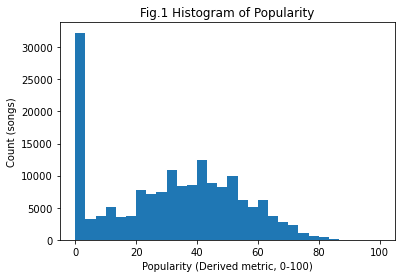

In [202]:
df['popularity'].plot.hist(bins = 30) 
plt.xlabel('Popularity (Derived metric, 0-100)')
plt.ylabel('Count (songs)')
plt.title('Fig.1 Histogram of Popularity')
plt.show()

#### Figure 1
This figure displays the histogram distribution of the 

### Artists

In [20]:
len(df['artists'].unique())

33375

In [43]:
df['artists'].value_counts()

['Эрнест Хемингуэй']                                  1215
['Francisco Canaro']                                   938
['Эрих Мария Ремарк']                                  781
['Ignacio Corsini']                                    620
['Frank Sinatra']                                      592
                                                      ... 
['Don Omar', 'Zion & Lennox']                            1
['Sia', 'Alan Walker']                                   1
['Excision', 'Space Laces']                              1
['A$AP Mob', 'A$AP Rocky', 'A$AP Twelvyy', 'KEY!']       1
['Cash Cash', 'Andy Grammer']                            1
Name: artists, Length: 33375, dtype: int64

### id

In [34]:
len(df['id'].unique())

169909

### Name

In [41]:
len(df['name'].unique())

132940

### Release date (yyyy-mm-dd)

In [44]:
len(df['release_date'].unique())

10882

In [45]:
df['release_date'].value_counts()

1945          1449
1949          1254
1935          1123
1948          1052
1930-01-01    1047
              ... 
1976-05-11       1
1977-07-04       1
1978-01-09       1
1978-11-08       1
2020-03-02       1
Name: release_date, Length: 10882, dtype: int64

### Danceability (0-1)

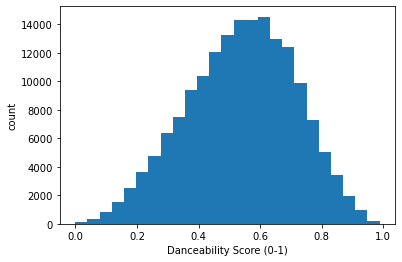

In [29]:
df['danceability'].plot.hist(bins = 25) 
plt.xlabel('Danceability Score (0-1)')
plt.ylabel('count')
plt.show()

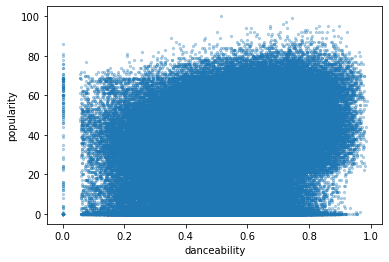

In [142]:
df.plot.scatter('danceability', 'popularity', alpha=0.3, s=5) 
plt.show()

### Energy (0-1)

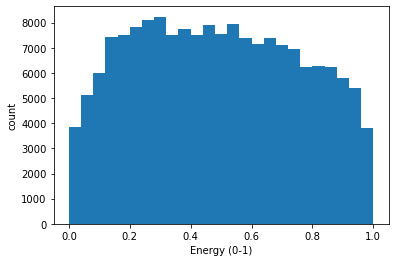

In [33]:
df['energy'].plot.hist(bins = 25) 
plt.xlabel('Energy (0-1)')
plt.ylabel('count')
plt.show()

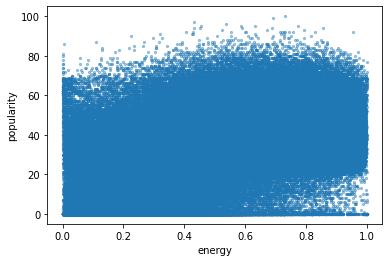

In [140]:
df.plot.scatter('energy', 'popularity', alpha=0.4,s=5) 
plt.show()

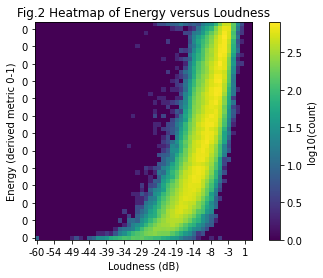

In [205]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['loudness'], df['energy'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy (derived metric 0-1)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.title('Fig.2 Heatmap of Energy versus Loudness')
plt.show()

#### Figure 2
This figure displays the heatmap of the 

### Instrumentalness (0-1)

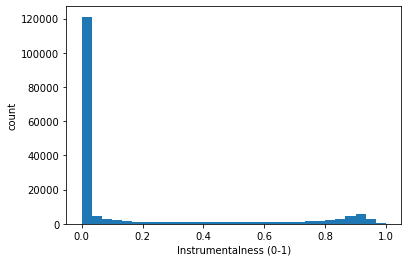

In [145]:
df['instrumentalness'].plot.hist(bins = 30) 
plt.xlabel('Instrumentalness (0-1)')
plt.ylabel('count')
plt.show()

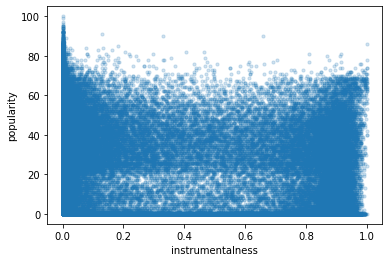

In [139]:
df.plot.scatter('instrumentalness', 'popularity', alpha=0.2, s=10) 
plt.show()

### Liveness (0-1)

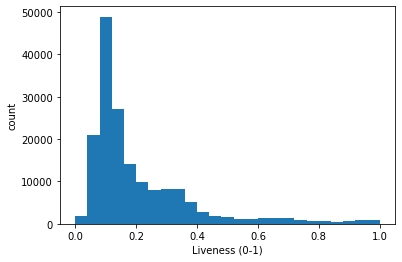

In [37]:
df['liveness'].plot.hist(bins = 25) 
plt.xlabel('Liveness (0-1)')
plt.ylabel('count')
plt.show()

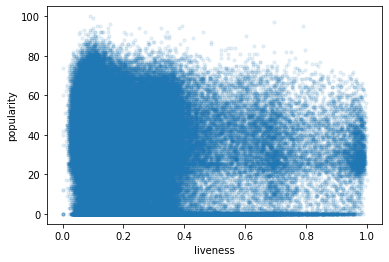

In [136]:
df.plot.scatter('liveness', 'popularity', alpha=0.1, s=10) 
plt.show()

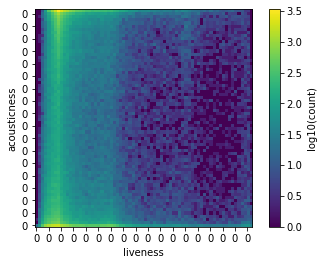

In [162]:
nbins = 70

heatmap, xedges, yedges = np.histogram2d(df['liveness'], df['acousticness'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('liveness')
plt.ylabel('acousticness')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

### Loudness (-60-0)

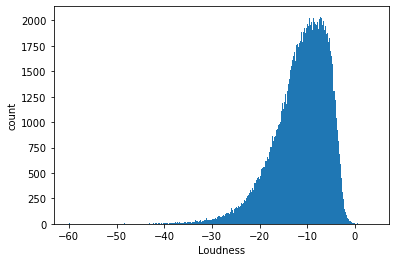

In [154]:
df['loudness'].plot.hist(bins = int(np.sqrt(df.shape[0]))) 
plt.xlabel('Loudness')
plt.ylabel('count')
plt.show()

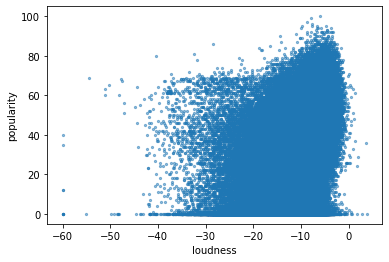

In [131]:
df.plot.scatter('loudness', 'popularity',alpha=0.5, s=5) 
plt.show()

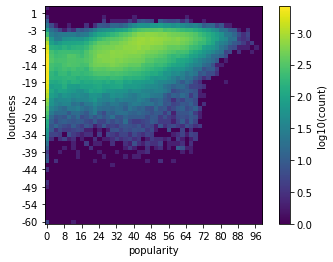

In [157]:
nbins = 50

heatmap, xedges, yedges = np.histogram2d(df['popularity'], df['loudness'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('popularity')
plt.ylabel('loudness')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

### Speechiness (0-1)

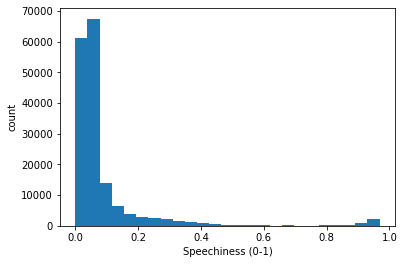

In [48]:
df['speechiness'].plot.hist(bins = 25) 
plt.xlabel('Speechiness (0-1)')
plt.ylabel('count')
plt.show()

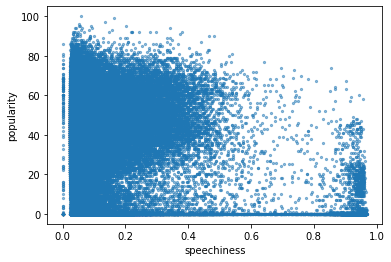

In [130]:
df.plot.scatter('speechiness', 'popularity', alpha=0.5, s=5) 
plt.show()

### Valence (0-1)

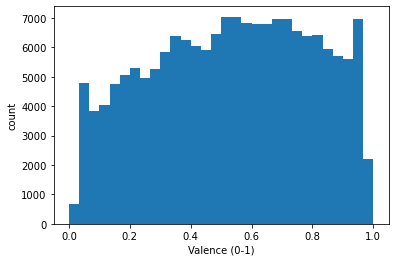

In [52]:
df['valence'].plot.hist(bins = 30) 
plt.xlabel('Valence (0-1)')
plt.ylabel('count')
plt.show()

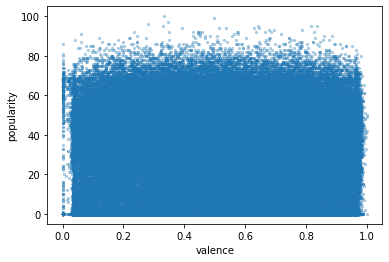

In [129]:
df.plot.scatter('valence', 'popularity' ,alpha=0.3, s=5) 
plt.show()

### Duration (ms)

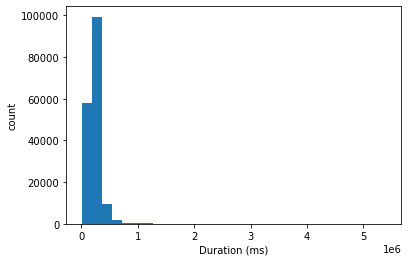

In [54]:
df['duration_ms'].plot.hist(bins = 30) 
plt.xlabel('Duration (ms)')
plt.ylabel('count')
plt.show()

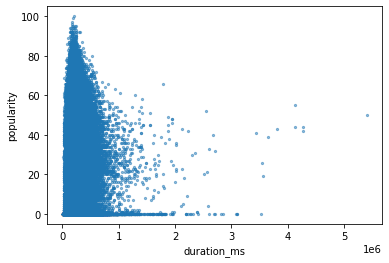

In [127]:
df.plot.scatter('duration_ms', 'popularity', alpha=0.5, s=5) 
plt.show()

### Tempo 

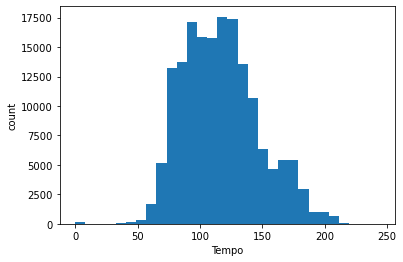

In [60]:
df['tempo'].plot.hist(bins = 30) 
plt.xlabel('Tempo')
plt.ylabel('count')
plt.show()

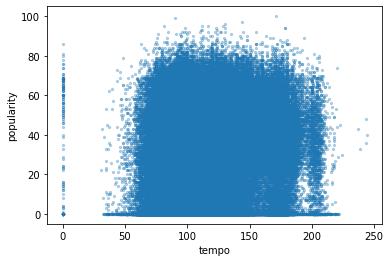

In [143]:
df.plot.scatter('tempo', 'popularity', alpha=0.3,s=5) 
plt.show()

### Year (1921-2020)

In [56]:
df['year'].value_counts()

1989    2000
1988    2000
1996    2000
1995    2000
1994    2000
        ... 
1925     263
1924     237
1923     169
1921     128
1922      72
Name: year, Length: 100, dtype: int64

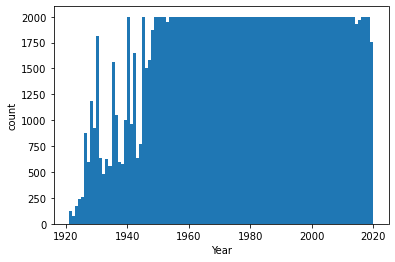

In [62]:
df['year'].plot.hist(bins = 100) 
plt.xlabel('Year')
plt.ylabel('count')
plt.show()

### Key (encoded as Int from 0-11)

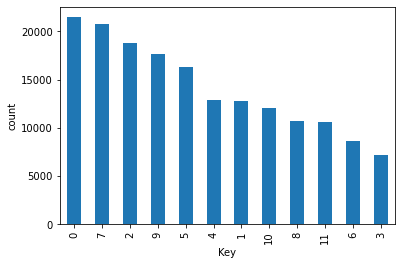

In [21]:
pd.value_counts(df['key']).plot.bar()
plt.ylabel('count')
plt.xlabel('Key')
plt.show()

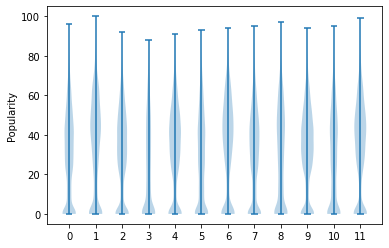

In [110]:
dataset = [df[df['key']==0]['popularity'].values,
           df[df['key']==1]['popularity'].values,
           df[df['key']==2]['popularity'].values,
           df[df['key']==3]['popularity'].values,
           df[df['key']==4]['popularity'].values,
           df[df['key']==5]['popularity'].values,
           df[df['key']==6]['popularity'].values,
           df[df['key']==7]['popularity'].values,
           df[df['key']==8]['popularity'].values,
           df[df['key']==9]['popularity'].values,
           df[df['key']==10]['popularity'].values,
           df[df['key']==11]['popularity'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['0','1','2','3','4','5','6','7','8','9','10','11'])
plt.ylabel('Popularity')
plt.show()

### Explicit
- 0: no explicit content in the song
- 1: explicit content in the song

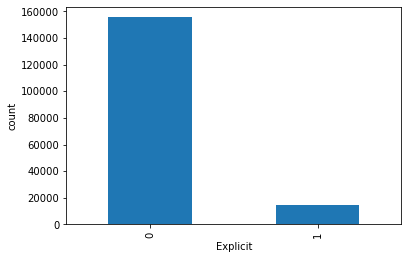

In [32]:
pd.value_counts(df['explicit']).plot.bar()
plt.ylabel('count')
plt.xlabel('Explicit')
plt.show()

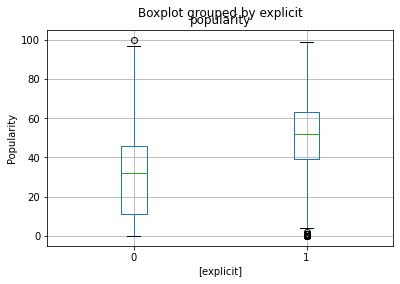

In [146]:
df[['popularity','explicit']].boxplot(by='explicit')
plt.ylabel('Popularity')
plt.show()

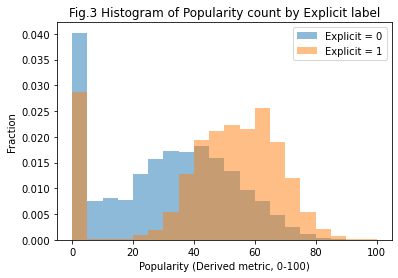

In [215]:
import matplotlib
from matplotlib import pylab as plt

categories = df['explicit'].unique()
bin_range = (df['popularity'].min(),df['popularity'].max())

for c in categories:
    plt.hist(df[df['explicit']==c]['popularity'],alpha=0.5,label='Explicit = '+str(c),range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Popularity (Derived metric, 0-100)')
plt.title('Fig.3 Histogram of Popularity count by Explicit label')
plt.show()

#### Figure 3
This figure displays the histogram distribution of the  

### Mode (0 = minor, 1 = major)

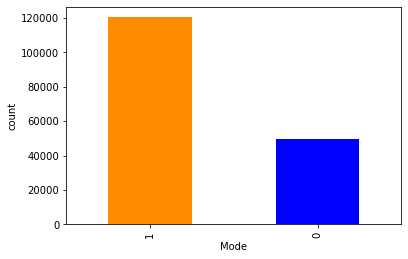

In [173]:
pd.value_counts(df['mode']).plot.bar(color=['darkorange','blue'])
plt.ylabel('count')
plt.xlabel('Mode')
plt.show()

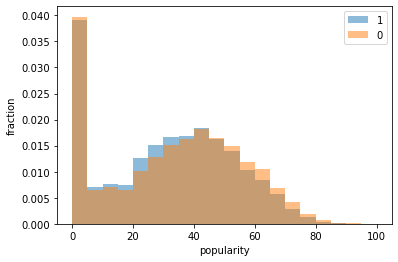

In [108]:
import matplotlib
from matplotlib import pylab as plt

categories = df['mode'].unique()
bin_range = (df['popularity'].min(),df['popularity'].max())

for c in categories:
    plt.hist(df[df['mode']==c]['popularity'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('popularity')
plt.show()

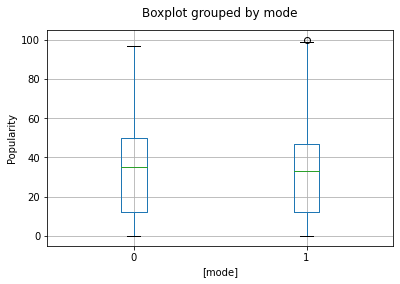

In [176]:
df[['popularity','mode']].boxplot(by='mode')
plt.title('')
plt.ylabel('Popularity')
plt.show()

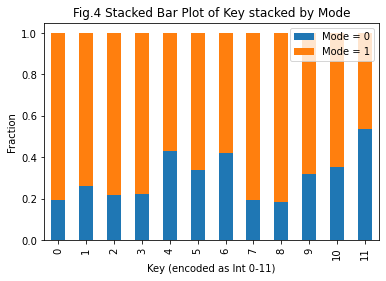

In [214]:
count_matrix = df.groupby(['key', 'mode']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction')
plt.xlabel('Key (encoded as Int 0-11)')
plt.title('Fig.4 Stacked Bar Plot of Key stacked by Mode')
plt.legend(loc=1, labels=['Mode = 0', 'Mode = 1'])
plt.show()

#### Figure 4
This figure displays...

# Scatter Matrix

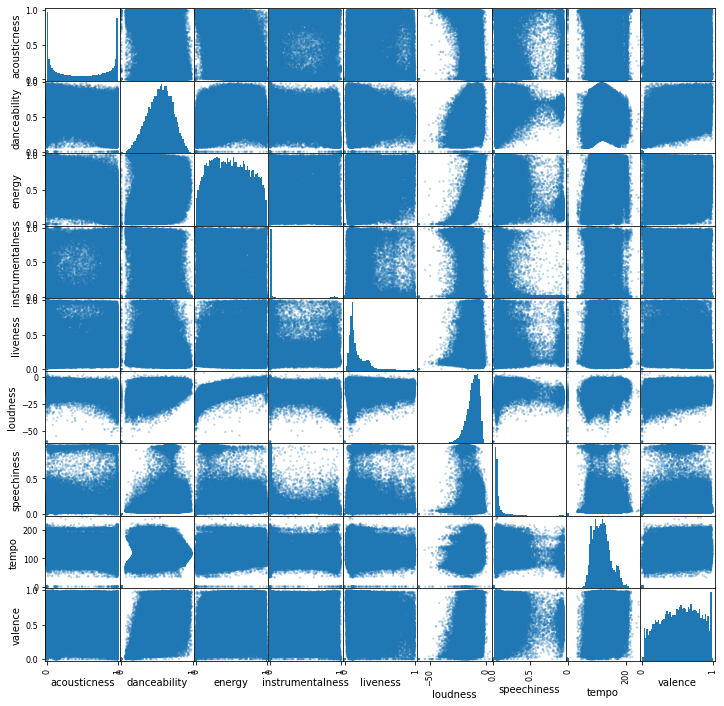

In [144]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(12, 12), marker='o',hist_kwds={'bins': 50}, alpha=0.3,
                           s=5)
plt.show()

### Data preprocessing (10 points)
- Discuss how you split the dataset and why.
- Is your dataset IID?
- Does it have group structure?
- Is it a time-series data?
- How should you split the dataset given your ML question to best mimic future use when you deploy the model?
- Apply MinMaxEncoder or StandardScaler on the continuous features
- Apply OneHotEncoder or OrdinalEncoder on categorical features
- Describe why you chose a particular preprocessor for each feature.
- How many features do you have in the preprocessed data?


- Splitting:
- iid? for the most part yes, but grouped by artists?
- It is not a time-series data
- Mimic future use when you deploy model?
- Preprocessing: 

In [179]:
X, y = df.loc[:, df.columns != 'popularity'], df['popularity']  
#print(y)
#print(X.head())

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,2020-02-28,0.0385,129.916,0.4720,2020


### Splitting

In [194]:
# since dataset is quite large, KFold is not required and could be expensive
# although dataset is large, number of songs with popular > 0 is small, so we will maintain 60-20-20 split
import pandas as pd
from sklearn.model_selection import train_test_split 

random_state = 4

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
#print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)
#print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

X_train.head(10)

training set: (101945, 18) (101945,)
test set: (33982, 18) (33982,)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year
95154,0.051600,['Aerosmith'],0.633,330533,0.8230,0,5fMwvrqujbQjUxcNPcYrUF,0.000496,5,0.1880,-5.792,1,Janie's Got A Gun,1994-01-01,0.0287,115.107,0.444,1994
145745,0.996000,['Sudha Mukherjee'],0.640,184093,0.0334,0,2efpT1LxzqM2sWghyvFf6s,0.956000,5,0.1070,-18.489,1,Amar Praner Majhe Sudha,1948-12-01,0.0585,71.680,0.254,1948
41124,0.971000,"['Ludwig van Beethoven', 'Arturo Toscanini']",0.545,191107,0.0719,0,2WxFoGMyzZyQG8dIufAQPT,0.853000,10,0.1130,-17.968,1,"Septet in E-Flat Major, Op. 20: III. Tempo di ...",1951,0.0380,118.404,0.388,1951
109470,0.969000,['Shamshad Begum'],0.615,146782,0.3890,0,0joz0J52hKwjOyMqscaE8z,0.000019,0,0.0886,-8.838,1,Nazar Mil Gayee,1948-01-01,0.0683,98.541,0.876,1948
27975,0.755000,['Deodato'],0.580,400467,0.4720,0,0mMgZR0m5hpvpf6llT9Spf,0.888000,7,0.3500,-16.363,1,Love Island,1978,0.0619,74.067,0.558,1978
57038,0.881000,['Keely Smith'],0.264,173267,0.1370,0,3FMegEhMI35X9vCg6W2Q3R,0.000000,7,0.1480,-15.314,1,Cocktails For Two,1958-05-21,0.0366,171.743,0.245,1958
38680,0.112000,['Eli Young Band'],0.365,210600,0.7270,0,1OxEiYzWJP8rheH8IDRslO,0.001740,4,0.1080,-5.022,0,Oklahoma Girl,2005-04-05,0.0415,175.943,0.494,2005
51011,0.359000,['Bonnie Raitt'],0.663,188867,0.8060,0,0t20gNty7DiINMBG6v8NUR,0.000000,2,0.1170,-6.548,1,You Gotta Be Ready for Love (If You Wanna Be M...,1974,0.0456,104.900,0.838,1974
101733,0.719000,['Irwin Kostal'],0.503,146427,0.0734,0,5nxBKbViyXlwwIIoDtUKHL,0.282000,5,0.4170,-16.231,1,Laendler,1964,0.0343,134.688,0.633,1964
7457,0.000039,['together PANGEA'],0.263,246947,0.8530,1,14q1CWouLEjFT6zu5re8hR,0.362000,0,0.0839,-4.532,1,Sick Shit,2014-01-01,0.0727,120.982,0.355,2014


### Preprocessing

In [196]:
# unordered categorical vars: one-hot encoder
from sklearn.preprocessing import OneHotEncoder
onehot_ftrs = ['explicit', 'key','mode']
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')

# fit and transform X_train
enc.fit(X_train[onehot_ftrs])
onehot_train = enc.transform(X_train[onehot_ftrs])

# transform X_val, X_test
onehot_val = enc.transform(X_val[onehot_ftrs])
onehot_test = enc.transform(X_test[onehot_ftrs])

print('feature names:',enc.get_feature_names(onehot_ftrs))
print(len(enc.get_feature_names(onehot_ftrs)))
print('transformed train features:')
print(onehot_train)
print('transformed val features:')
print(onehot_val)
print('transformed test features:')
print(onehot_test)

feature names: ['explicit_0' 'explicit_1' 'key_0' 'key_1' 'key_2' 'key_3' 'key_4' 'key_5'
 'key_6' 'key_7' 'key_8' 'key_9' 'key_10' 'key_11' 'mode_0' 'mode_1']
16
transformed train features:
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]
transformed val features:
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
transformed test features:
[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]]


In [198]:
# continuous vars: the standard scaler
from sklearn.preprocessing import StandardScaler
std_ftrs = ['acousticness','danceability','duration_ms','energy','liveness','loudness','tempo','valence']
scaler = StandardScaler()

# fit and transform X_train
std_train = scaler.fit_transform(X_train[std_ftrs])

# transform X_val, X_test
std_val = scaler.transform(X_val[std_ftrs])
std_test = scaler.transform(X_test[std_ftrs])

print('transformed train features:')
print(std_train)
print('transformed val features:')
print(std_val)
print('transformed test features:')
print(std_test)

transformed train features:
[[-1.17160635  0.54223618  0.81809041 ...  0.98369603 -0.06042605
  -0.33289568]
 [ 1.3373768   0.58213202 -0.39348259 ... -1.25289048 -1.4742027
  -1.0559408 ]
 [ 1.27095942  0.04068857 -0.33545218 ... -1.16111592  0.0469086
  -0.54600372]
 ...
 [ 1.23642238 -0.80852274  0.92112873 ... -1.18930004 -0.52554284
  -1.12824531]
 [ 0.49520436 -0.11889477  0.34341425 ...  0.09395842 -0.39366154
   0.1770414 ]
 [-1.26246533  0.69042071 -0.05757803 ...  0.60902331 -0.00905387
   0.10854239]]
transformed val features:
[[-0.07332846  0.38835226  0.06398467 ... -0.18893974  1.48044628
   1.10177805]
 [ 1.32675002  1.43704273 -0.38630946 ...  0.67965978 -0.0467854
   1.36435759]
 [-1.18170179 -0.97380548  0.46122905 ... -0.39433155 -1.62014786
  -1.45551836]
 ...
 [ 0.96278275 -1.67483226 -0.04235477 ... -1.04961247  1.62196393
  -1.03691329]
 [-0.68436841 -0.03340369  0.23331863 ...  0.3026971  -1.09893838
  -1.14727281]
 [-0.77469605  0.75311416  0.43221384 ...  0.33

### References (2 points)
Cite previous work and add your citations to the ‘References’ section which should be the last section of your report.


### Github repository (3 points)
- Please create a public github repository for your project and include the link in your report.
- For now, there should be three folders in your repository:
    - data: download your dataset into this folder.
    - figures: any figures you make should be saved in this folder in png, jpg, or pdf format. You can and should have
        more figures in here than what you have in your report.
    - src: your python notebooks should be in this folder. Make sure that your code reads in the data from the data  folder and saves the figures directly into the figures folder.
